<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/Ascl1_MEF_Seatac_Supplementary_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examining nucleosomal changes of Ascl1 motifs in Ascl1 induced reprogramming


In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                       
 [2] "Building dependency tree..."                                                    
 [3] "Reading state information..."                                                   
 [4] "libgsl-dev is already the newest version (2.4+dfsg-6)."                         
 [5] "The following packages were automatically installed and are no longer required:"
 [6] "  gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 imagemagick-6-common" 
 [7] "  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev"       
 [8] "  liblqr-1-0 liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7"          
 [9] "  libmagick++-6.q16-dev libmagickcore-6-arch-config libmagickcore-6-headers"    
[10] "  libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra libmagickcore-6.q16-dev"    
[11] "  libmagickwand-6-headers libmagickwand-6.q16-3 libmagickwand-6.q16-dev"        
[12] "  librsvg2-dev"                                                                 
[13] "Use 'apt autoremove' to remove them."                                           
[14] "0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded."

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # required by R package ComplexHeatmap 

[1] "Reading package lists..."                                                       
 [2] "Building dependency tree..."                                                    
 [3] "Reading state information..."                                                   
 [4] "libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1)."              
 [5] "The following packages were automatically installed and are no longer required:"
 [6] "  gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 imagemagick-6-common" 
 [7] "  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev"       
 [8] "  liblqr-1-0 liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7"          
 [9] "  libmagick++-6.q16-dev libmagickcore-6-arch-config libmagickcore-6-headers"    
[10] "  libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra libmagickcore-6.q16-dev"    
[11] "  libmagickwand-6-headers libmagickwand-6.q16-3 libmagickwand-6.q16-dev"        
[12] "  librsvg2-dev"                                                                 
[13] "Use 'apt autoremove' to remove them."                                           
[14] "0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded."

In [ ]:
system('apt-get install libmagick++-dev', intern = TRUE) # required by magick
system('apt-get install libmagick-dev', intern = TRUE) # for magick

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following packages were automatically installed and are no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [5] "  libgraphics-magick-perl libgraphicsmagick++-q16-12 libgraphicsmagick++1-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [6] "  libgraphicsmagick-q16-3 libgraphicsmagick1-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
 [7] "Use 'apt autoremove' to remove them."                                                                                  

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following packages were automatically installed and are no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [5] "  gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [7] "  liblqr-1-0 liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7"                                                 

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 
  'dplyr',
  'BSgenome.Mmusculus.UCSC.mm10', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'magick', 'patchwork', 'ggrepel',
  'chromVAR', 'motifmatchr',
  'EnrichedHeatmap', 'circlize', 
  'ChIPseeker', 'clusterProfiler'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

In [ ]:
library(devtools)

Loading required package: usethis



### Install SeATAC from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)


* checking for file ‘/tmp/RtmpAup3uA/remotes966af0752fc/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Install other non-CRAN packages

In [ ]:
devtools::install_github("GreenleafLab/chromVARmotifs")

Skipping install of 'chromVARmotifs' from a github remote, the SHA1 (38bed559) has not changed since last install.
  Use `force = TRUE` to force installation



### Load R packages

In [ ]:
library(GenomicRanges)
library(motifmatchr)
library(chromVARmotifs)
library(patchwork)
library(dplyr)
library(seatac)
library(GenomicRanges)
library(BSgenome.Mmusculus.UCSC.mm10)




Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The 

In [ ]:
library(GenomicRanges)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(ggplot2)
library(magick)
library(patchwork)
library(chromVAR)
library(motifmatchr)
library(chromVARmotifs)
library(ggrepel)
library(circlize)
library(EnrichedHeatmap)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(RColorBrewer)

Linking to ImageMagick 6.9.7.4
Enabled features: fontconfig, freetype, fftw, lcms, pango, x11
Disabled features: cairo, ghostscript, heic, raw, rsvg, webp

Using 8 threads

circlize version 0.4.14
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:Biostrings’:

    pattern


Loading required package: ComplexHeatmap

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you

### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 1.264508 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  heatmap_window_size = 2000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 5L,
  step_size = 200L,

  vae_num_peaks = 5000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,

  target_width = 100L,
  min_test_reads = 1L,
  max_test_reads = 10L,
  center_width = 100L # the center width
)

## Load BAM files

In [ ]:
remote_bam_files <- c(
  MEF = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam',
  MEF_Ascl1_D22 = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam'
)
for (i in 1:length(remote_bam_files)){
  sprintf('wget -cx %s', remote_bam_files[i]) %>% system()
}

In [ ]:
local_bam_files <- gsub('https://', './', remote_bam_files)
all(file.exists(local_bam_files))

[1] TRUE

## Load bed files

In [ ]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (i in 1:length(remote_bed_files)){
  sprintf('wget -cx %s', remote_bed_files[i]) %>% system()
}
local_bed_files <- gsub('https://', './', remote_bed_files)
all(file.exists(local_bed_files))

[1] TRUE

## Training VAE

In [ ]:
models <- list()

In [ ]:
cond <- c('MEF', 'MEF_Ascl1_D22')

In [ ]:
gr0 <- lapply(local_bed_files[cond], function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]

In [ ]:
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files[cond], genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



In [ ]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(cond)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()

number of training peaks for VaeModel: 4910



In [ ]:
x <- read_vplot(
  gr, 
  filenames = local_bam_files[cond], 
  genome = BSgenome.Mmusculus.UCSC.mm10, 
  bin_size = ARGS[['bin_size']], 
  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), 
  fragment_size_interval = ARGS[['fragment_size_interval']]
)

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
models[['MEF']] <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 6872.8196740 | loss_reconstruction= 6871.7705329 | loss_kl=    1.0491496

epoch=     2/   200 | beta=1.000e+00 | loss= 5464.0088892 | loss_reconstruction= 5457.3697291 | loss_kl=    6.6391674

epoch=     3/   200 | beta=1.000e+00 | loss= 4755.2645358 | loss_reconstruction= 4749.8078801 | loss_kl=    5.4566500

epoch=     4/   200 | beta=1.000e+00 | loss= 3843.9821402 | loss_reconstruction= 3841.1332194 | loss_kl=    2.8489406

epoch=     5/   200 | beta=1.000e+00 | loss= 2672.5027231 | loss_reconstruction= 2671.1499399 | loss_kl=    1.3527952

epoch=     6/   200 | beta=1.000e+00 | loss= 1579.8736009 | loss_reconstruction= 1579.2897417 | loss_kl=    0.5838598

epoch=     7/   200 | beta=1.000e+00 | loss=  902.2466665 | loss_reconstruction=  901.9778082 | loss_kl=    0.2688633

epoch=     8/   200 | beta=1.000e+00 | loss=  585.6313437 | loss_reconstruction=  585.4653234 | loss_kl=    0.1660206

epoch=     9/   200 | beta=1.000e+00 | loss=  44

## Download related `pileup` and `fold enrichment` bigwig files

In [ ]:
remote_bw_files <- c(
	'MNase'                             = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/MNase_treat_pileup.bw',
	'H3'                                = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3_treat_pileup.bw',
	'H3K9me3'                           = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K9me3_treat_pileup.bw',
	'H3K27me3'                          = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K27me3_treat_pileup.bw',
	'H3K36me3'                          = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K36me3_treat_pileup.bw',
	'H3K9ac'                            = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K9ac_treat_pileup.bw',
	'H3K79me2'                          = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K79me2_treat_pileup.bw',
	'H3K4me2'                           = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K4me2_treat_pileup.bw',
	'H3K4me1'                           = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K4me1_treat_pileup.bw',
	'Hdac1'                             = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/Hdac1_treat_pileup.bw',
	'H3.3'                              = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3.3_treat_pileup.bw',
	'P300'                              = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/P300_treat_pileup.bw'
	
)

In [ ]:
for (i in 1:length(remote_bw_files)){
  sprintf('wget -cx %s', remote_bw_files[i]) %>% system()
}

In [ ]:
local_bw_files <- gsub('https://', './', remote_bw_files)

## Ascl1 motif

In [ ]:
data('homer_pwms') # 321 TF motifs from Homer database

In [ ]:
j <- 'Ascl1(bHLH)/NeuralTubes-Ascl1-ChIP-Seq(GSE55840)/Homer'
homer_pwms[j]

PWMatrixList of length 1
names(1): Ascl1(bHLH)/NeuralTubes-Ascl1-ChIP-Seq(GSE55840)/Homer

### Extract motif centric regions

In [ ]:
gr <- matchMotifs(homer_pwms[j], gr0, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr)) %>% message()

number of motif-centric regions: 71616



### Read motif centric V-plots

In [ ]:
x_MEF <- read_vplot(gr, filenames = local_bam_files[c('MEF', 'MEF_Ascl1_D22')], genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



### Get the latent representations of the V-plots

In [ ]:
x_MEF <- models[['MEF']] %>% predict(x_MEF, batch_size = ARGS[['vae_batch_size']], vplots = FALSE)

### Calling significant V-plots

In [ ]:
res_MEF <- models[['MEF']] %>% results(x_MEF, type = 'vplots', contrast = c('name', 'MEF', 'MEF_Ascl1_D22'), width = ARGS[['center_width']])
res_MEF$group <- 'MEF'
res <- c(res_MEF)
res$NOR_NFR <- res$padj < 0.05 & res$log_ratio < -0.1
res$NFR_NOR <- res$padj < 0.05 & res$log_ratio > 0.1

In [ ]:
res_new <- res[res$padj < 0.05 ]

### Read significant regions V-plots

In [ ]:
seqlevels(res_new) <- seqlevels(gr)

In [ ]:
x_MEF <- read_vplot(res_new, filenames = local_bam_files[c('MEF', 'MEF_Ascl1_D22')], genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



### Get the estimated counts for regions with Vplots that are significantly differential

In [ ]:
x_MEF <- models[['MEF']] %>% predict(x_MEF, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

In [ ]:
res_w <- resize(res_new, width = 2000L, fix = 'center')

i
FALSE  TRUE 
29295  7071 

i
FALSE  TRUE 
12268 24098 

Warning message:
“Removed 128 rows containing missing values (geom_raster).”
Warning message:
“Removed 128 rows containing missing values (geom_raster).”


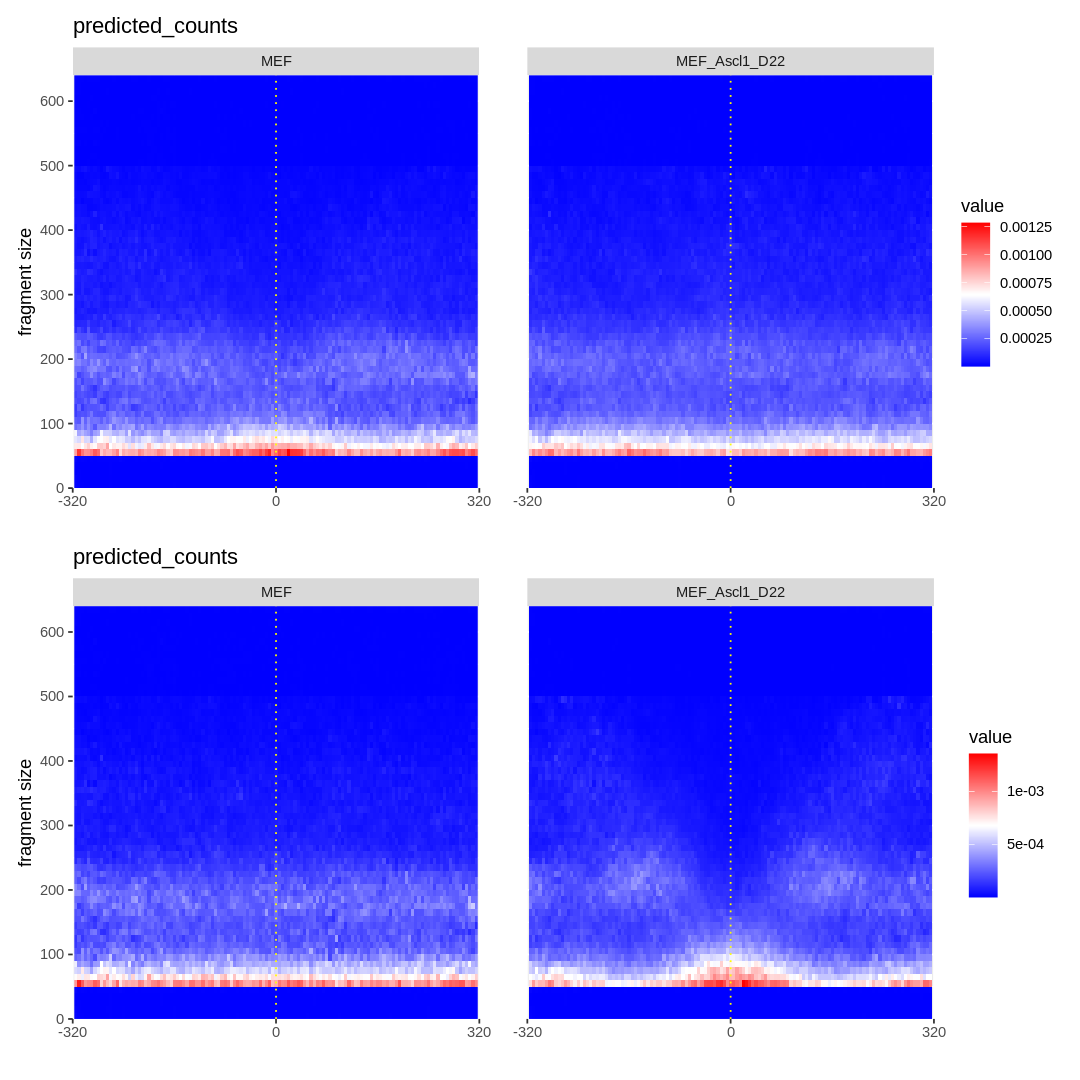

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
i <- res_new$padj < 0.05 & res_new$log_ratio > 0.1
table(i)
p1 <- vplot(x_MEF[i], 'predicted_counts')
i <- res_new$padj < 0.05 & res_new$log_ratio < -0.1
table(i)
p2 <- vplot(x_MEF[i], 'predicted_counts')
p1 / p2

### Prepare `noramlizedMatrix` for `EnrichedHeatmap`

In [ ]:
cvg <- list()
for (i in 1:length(local_bw_files)){
  cvg[[names(local_bw_files)[i]]] <- rtracklayer::import(local_bw_files[i], which = res_w)
}

In [ ]:
smooth <- FALSE
extend <- ARGS[['heatmap_window_size']] / 2 - ARGS[['target_width']] / 2
target_ratio <- 1 / (2 * extend  / ARGS[['target_width']] + 1)
sprintf('target_ratio:%.3f', target_ratio) %>% message()

target_ratio:0.050



In [ ]:
is_MEF <- grepl('^MEF_', names(local_bw_files)) | names(local_bw_files) %in% c('MNase', 'H3', 'H3K9me3', 'H3K27me3', 'H3K36me3', 'H3K9ac', 'H3K79me2', 'H3K4me2', 'H3K4me1', 'Hdac1', 'H3.3', 'P300')

In [ ]:
mat <- list()

In [ ]:
mat[['MEF']] <- lapply(cvg[is_MEF], function(cvgi){
  normalizeToMatrix(
    cvgi,
    resize(res_w[res_w$group == 'MEF' & (res_w$NOR_NFR | res_w$NFR_NOR)], fix = 'center', width = ARGS[['target_width']]),
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = 10, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
})

In [ ]:
group_cols <- c(
	'MNase'                             = 'black',
	'H3'                                = 'black',
	'H3K9me3'                           = 'orange',
	'H3K27me3'                          = 'orange',
	'H3K36me3'                          = 'orange',
	'H3K9ac'                            = 'orange',
	'H3K79me2'                          = 'orange',
	'H3K4me2'                           = 'orange',
	'H3K4me1'                           = 'orange',
	'Hdac1'                             = 'black',
	'H3.3'                              = 'black',
	'P300'                              = 'blue'
)

### MEF heatmaps

In [ ]:
col_fun <- lapply(names(mat[['MEF']]), function(i) colorRamp2(quantile(mat[['MEF']][[i]], c(0.005, 0.995)), c('white', group_cols[i])))
names(col_fun) <- names(mat[['MEF']])

In [ ]:
sp <- res_w[res_w$group == 'MEF' & (res_w$NOR_NFR | res_w$NFR_NOR)]$NOR_NFR
sp <- factor(sp, c(TRUE, FALSE), labels = c('NOR_NFR', 'NFR_NOR'))
table(sp)

sp
NOR_NFR NFR_NOR 
  24098    7071 

In [ ]:
saveRDS(res_w, 'Ascl1_res_w.rds')

## Need to run this section on MSI, requires more RAM

In [ ]:
lgd <- Legend(
  at = c('NOR_NFR', 'NFR_NOR'),
  title = "Clusters", 
  type = "lines", 
  legend_gp = gpar(col = 1:2)
)
ta <- HeatmapAnnotation(
  enriched = anno_enriched(
    gp = gpar(col = 1:2, lty = 1, lwd = 2),
    axis_param = list(facing = 'inside',at = -1000)
  )
)
ht_list <- Heatmap(
  as.character(sp), 
  col = structure(1:2, names = c('NOR_NFR', 'NFR_NOR')),
  name = "partition",
  show_row_names = FALSE, 
  width = unit(3, "mm")
) + 
 EnrichedHeatmap(
  mat[['MEF']][['MNase']],
  col = col_fun[['MNase']],
  top_annotation = ta,
  pos_line = TRUE,
  use_raster=TRUE,
  raster_by_magick=TRUE,
  name = 'MNase'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K27me3']],
  col = col_fun[['H3K27me3']],
  top_annotation = ta,
  pos_line = TRUE,
  use_raster=TRUE,
  raster_by_magick=TRUE,
  name = 'H3K27me3'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K36me3']],
  col = col_fun[['H3K36me3']],
  top_annotation = ta,
  pos_line = TRUE,
  use_raster=TRUE,
  raster_by_magick=TRUE,
  name = 'H3K36me3'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K9ac']],
  col = col_fun[['H3K9ac']],
  top_annotation = ta,
  pos_line = TRUE,
  use_raster=TRUE,
  raster_by_magick=TRUE,
  name = 'H3K9ac'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K79me2']],
  col = col_fun[['H3K79me2']],
  top_annotation = ta,
  pos_line = TRUE,
  use_raster=TRUE,
  raster_by_magick=TRUE,
  name = 'H3K79me2'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K4me2']],
  col = col_fun[['H3K4me2']],
  top_annotation = ta,
  pos_line = TRUE,
  use_raster=TRUE,
  raster_by_magick=TRUE,
  name = 'H3K4me2'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K4me1']],
  col = col_fun[['H3K4me1']],
  top_annotation = ta,
  pos_line = TRUE,
  use_raster=TRUE,
  raster_by_magick=TRUE,
  name = 'H3K4me1'
) + EnrichedHeatmap(
  mat[['MEF']][['P300']],
  col = col_fun[['P300']],
  top_annotation = ta,
  pos_line = TRUE,
  use_raster=TRUE,
  raster_by_magick=TRUE,
  name = 'P300'
)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly set

In [ ]:
pdf(file = "Ascl1_Enriched_heatmap.pdf",
    width = 10, 
    height = 6)
draw(ht_list, split = sp, annotation_legend_list = list(lgd), heatmap_legend_side = "bottom")
dev.off()

In [ ]:
#options(repr.plot.width = 25, repr.plot.height = 12)
#draw(ht_list, split = sp, annotation_legend_list = list(lgd), heatmap_legend_side = "bottom")

## Prepare data for pathway analysis

In [ ]:
grl <- list(
  MEF_NOR_NFR = granges(res_new[res_new$group == 'MEF' & res_new$NOR_NFR]),
  MEF_NFR_NOR = granges(res_new[res_new$group == 'MEF' & res_new$NFR_NOR])
)

In [ ]:
pl <- lapply(grl, function(s) annotatePeak(s, tssRegion = c(-2000, 500),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,annoDb = 'org.Mm.eg.db'))

>> preparing features information...		 2022-04-01 07:34:10 PM 
>> identifying nearest features...		 2022-04-01 07:34:11 PM 
>> calculating distance from peak to TSS...	 2022-04-01 07:34:11 PM 
>> assigning genomic annotation...		 2022-04-01 07:34:11 PM 
>> adding gene annotation...			 2022-04-01 07:34:27 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-01 07:34:28 PM 
>> done...					 2022-04-01 07:34:28 PM 
>> preparing features information...		 2022-04-01 07:34:28 PM 
>> identifying nearest features...		 2022-04-01 07:34:28 PM 
>> calculating distance from peak to TSS...	 2022-04-01 07:34:28 PM 
>> assigning genomic annotation...		 2022-04-01 07:34:28 PM 
>> adding gene annotation...			 2022-04-01 07:34:31 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-01 07:34:31 PM 
>> done...					 2022-04-01 07:34:31 PM 


## Examine the genomic distribution of NOR->NFR and NFR->NOR groups

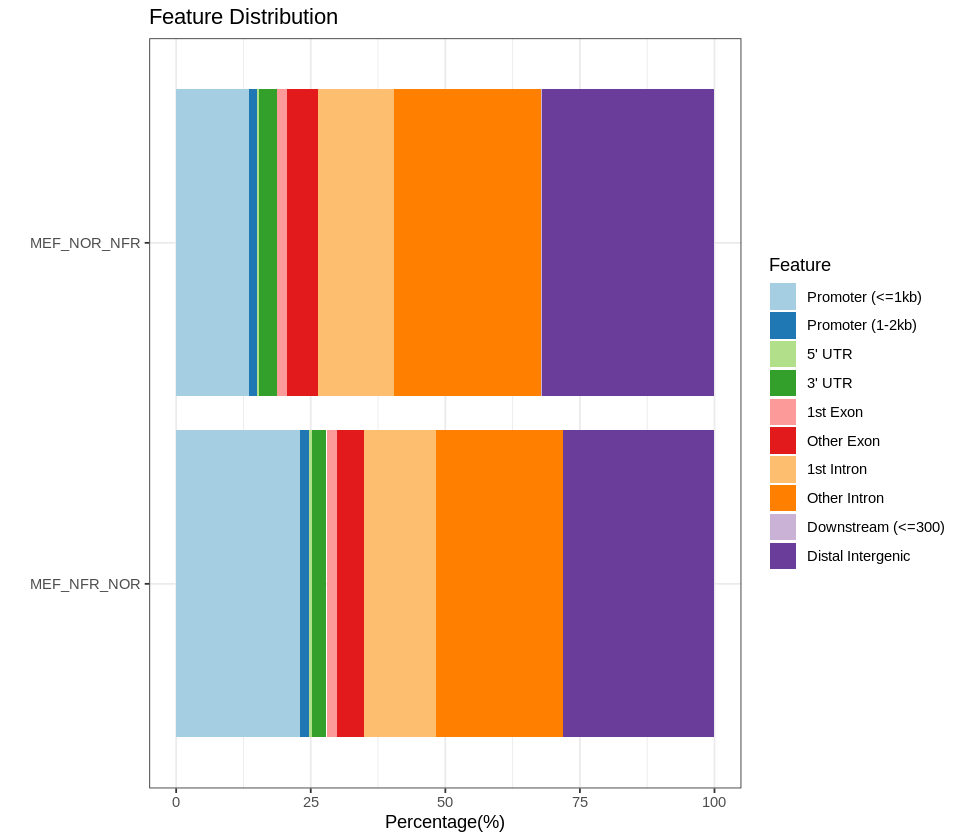

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 7)
plotAnnoBar(pl)

In [ ]:
sp <- lapply(pl, function(xx) unique(as.data.frame(xx)$geneId))
lapply(sp,length)

$MEF_NOR_NFR
[1] 7992

$MEF_NFR_NOR
[1] 3729

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2                       
 [2] clusterProfiler_4.2.2                    
 [3] ChIPseeker_1.30.3                        
 [4] org.Mm.eg.db_3.14.0                      
 [5] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [6] Genomi

In [ ]:
Sys.time() - start_time

Time difference of 1.326232 hours